C:\Users\effor\AppData\Local\Temp\ipykernel_12716\347884344.py:281: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=chrome_options)



DB connect 성공!!

20 rows deleted
1 rows deleted
20 rows deleted
원하는 키워드를 검색하세요.은행
크롤링을 시작합니다.
-----------------------------------------------
제목 :  은행 부도  터집니다
DB connect 성공!!
INSERT 완료
-----------------------------------------------
-----------------------------------------------
제목 :  우리나라 5대은행도 위험하다  올해 9월 부실대출 37조원 돌아온다
DB connect 성공!!
INSERT 완료
-----------------------------------------------
-----------------------------------------------
제목 :  전 한국은행 총재 박승이 한 부동산 폭락 예언 ㅣ 이만큼이나 정확할 수 있다고
DB connect 성공!!
INSERT 완료
-----------------------------------------------
-----------------------------------------------
제목 :  한국인이 일본 3대 은행에 취업하고 느낀점들
DB connect 성공!!
INSERT 완료
-----------------------------------------------
-----------------------------------------------
제목 :  와 진짜 은행 직원인 줄 보이스피싱 실제 대화 제보영상  YTN
DB connect 성공!!
INSERT 완료
-----------------------------------------------
-----------------------------------------------
제목 :  계속되는 미국은행파산위기  실업수당청구에 나타나는 위기징조
DB connect 성공!!
INSERT 

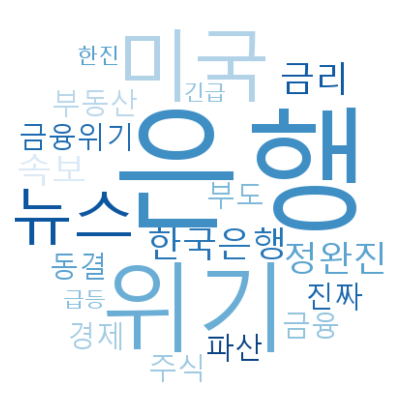

In [1]:
from selenium import webdriver
from time import sleep
from bs4 import BeautifulSoup
from urllib.parse import quote
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
import datetime
import time
import random
import cx_Oracle
import re
from selenium.webdriver.chrome.service import Service
from openpyxl import Workbook
from selenium.common.exceptions import ElementNotInteractableException ## 추가됨
from selenium.common.exceptions import NoSuchElementException ## 추가됨
import sys ## 추가됨
import pandas as pd
import numpy as np
import os
from konlpy.tag import Okt
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
from PIL import *

#메인 키워드와 관련있는 테이블 초기화
def db_delete_main():
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    print('')
    print('DB connect 성공!!')
    print('')

    cs = conn.cursor()
    
    sql = "DELETE FROM MAIN_TITLE"
    sql1 = "DELETE FROM MAIN_KEYWORD"
    sql2 = "DELETE FROM MAIN_NOUN_COUNT"
    
    cs.execute(sql)
    deleted_rows = cs.rowcount
    print(f"{deleted_rows} rows deleted")

    
    cs.execute(sql1)
    deleted_rows1 = cs.rowcount
    print(f"{deleted_rows1} rows deleted")
    
    cs.execute(sql2)
    deleted_rows2 = cs.rowcount
    print(f"{deleted_rows2} rows deleted")
    
    cs.close()
    conn.commit()
    conn.close()

#title 크롤링
def get_data(main_keyword):
    #원하는 검색어 입력받음
    main_k = main_keyword
    
    # MAIN_KEYWORD 테이블에 MAIN_K저장
    insert_main(main_k)
    
    #URL 지정
    URL = f"https://www.youtube.com/results?search_query={quote(main_k)}"
    
    print("크롤링을 시작합니다.")
    
    #URL 실행
    driver.get(URL)
    #필터 버튼 클릭
    driver.find_element(By.XPATH, '//*[@id="container"]/ytd-toggle-button-renderer/yt-button-shape/button/yt-touch-feedback-shape/div/div[2]').click()
    sleep(1)

    #이번 달
    upload_date = driver.find_element(By.XPATH,'//*[@id="collapse-content"]/ytd-search-filter-group-renderer[1]')
    click_list_1 = upload_date.find_elements(By.ID,"endpoint")
    click_list_1[3].click()
    sleep(1)
    #필터 버튼 클릭
    driver.find_element(By.XPATH, '//*[@id="container"]/ytd-toggle-button-renderer/yt-button-shape/button/yt-touch-feedback-shape/div/div[2]').click()
    sleep(1)
    #동영상 길이 버튼 클릭
    length = driver.find_element(By.XPATH,'//*[@id="collapse-content"]/ytd-search-filter-group-renderer[3]')
    sleep(0.5)
    click_list_2 = length.find_elements(By.ID,"endpoint")
    sleep(0.5)
    click_list_2[1].click()
    sleep(1)
    
    # 무한 스크롤 함수 실행
    # scroll()

    # 페이지 소스 추출
    html_source = driver.page_source
    soup_source = BeautifulSoup(html_source, 'html.parser')

    # 콘텐츠 모든 정보
    content_total = soup_source.find_all(class_ = 'yt-simple-endpoint style-scope ytd-video-renderer')
    # 콘텐츠 제목만 추출
    content_total_title = list(map(lambda data: data.get_text().replace("\n", ""), content_total))
    

    i = 0
    for title in content_total_title:
        title = cleansing_sentence(content_total_title[i])
        
        print("-----------------------------------------------")
        print("제목 : ",title)
        db_insert(main_k,title)
        print("-----------------------------------------------")
        
        i = i + 1

    print("크롤링 완료했습니다.")

#메인 키워드 저장
def insert_main(keyword):
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    cs = conn.cursor()
    sql_insert = 'INSERT INTO MAIN_KEYWORD (MAIN_K) VALUES (:1)'

    cs.execute(sql_insert, (keyword,))
    
    cs.close()
    conn.commit()
    conn.close()

#무한 스크롤
def scroll():
    try:       
        # 페이지 내 스크롤 높이 받아오기
        last_page_height = driver.execute_script("return document.documentElement.scrollHeight")
        while True:
            # 임의의 페이지 로딩 시간 설정
            # PC환경에 따라 로딩시간 최적화를 통해 scraping 시간 단축 가능
            pause_time = random.uniform(1, 2)
            # 페이지 최하단까지 스크롤
            driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
            # 페이지 로딩 대기
            time.sleep(pause_time)
            # 무한 스크롤 동작을 위해 살짝 위로 스크롤(i.e., 페이지를 위로 올렸다가 내리는 제스쳐)
            driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight-50)")
            time.sleep(pause_time)
            # 페이지 내 스크롤 높이 새롭게 받아오기
            new_page_height = driver.execute_script("return document.documentElement.scrollHeight")
            # 스크롤을 완료한 경우(더이상 페이지 높이 변화가 없는 경우)
            if new_page_height == last_page_height:
                print("스크롤 완료")
                break
                
            # 스크롤 완료하지 않은 경우, 최하단까지 스크롤
            else:
                last_page_height = new_page_height
            
    except Exception as e:
        print("에러 발생: ", e)


#문장 정리
def cleansing_sentence(input_string):
    string_pattern = re.compile(r'[^ㄱ-힣 0-9 a-z A-Z]')
    cleansing_string = string_pattern.sub('', input_string)
    return cleansing_string

#테이블에 삽입
def db_insert(title,link):
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    print('DB connect 성공!!')
    
    cs = conn.cursor()
    
    sql = "INSERT INTO MAIN_TITLE (MAIN_K,TITLE) VALUES (:1, :2)"

    cs.execute(sql, (title,link))
    
    print("INSERT 완료")
    cs.close()
    conn.commit()
    conn.close()

#sql문으로 db에서 값 가져오기
def make_df(sql):
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    cs = conn.cursor()
    sql = sql
    cs.execute(sql)
    row = cs.fetchall()
    colname = cs.description
    col = []
    for i in colname:
        col.append(i[0])
    df =  pd.DataFrame(row,columns = col)
    return df

# okt를 통한 명사 분석 = 키워드 추출
def keyword_okt_noun(column):
    okt = Okt()
    arr = np.array(column)
    temp = []
    for i in range(len(arr)):
        temp.append(okt.nouns(arr[i]))
    noun = sum(temp,[])
    df = pd.DataFrame({'Noun':noun})
    noun_set = set(noun)
    noun_kind = list(noun_set)
    num=[]
    j=0
    for i in range(len(noun_kind)):
        num.append(len(df[df['Noun']==noun_kind[j]]))
        j=j+1
    #데이터프레임 생성 및 정렬
    df1 = pd.DataFrame({'Noun':noun_kind,'count':num})
    df1s = df1.sort_values('count',ascending=False)
    return df1s

def mk_nc_insert(mk_nc_df):
    df = mk_nc_df
    NOUN = list(df['Noun'])
    COUNT = list(df['count'])
    MAIN_K = select_main()[0][0] 
    
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    print('DB connect 성공!!')
    cs = conn.cursor()
    sql = "INSERT INTO MAIN_NOUN_COUNT (MAIN_K, NOUN, COUNT) VALUES(:1, :2, :3)"
    
    for i in range(len(df)):
        cs.execute(sql, (MAIN_K, NOUN[i], COUNT[i]))
        
    print('INSERT 성공!!')
    cs.close()
    conn.commit()
    conn.close()

#메인 키워드 가져오기.
def select_main():
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    cs = conn.cursor()
    select_main_keyword= 'select MAIN_K from MAIN_KEYWORD'
    cs.execute(select_main_keyword)
    
    main_keyword = cs.fetchall()
    cs.close()
    conn.close()
    return main_keyword

def word_cloud(str):
    
    df = str
    
    MAIN_K = select_main()[0][0]
    
    cand_mask=np.array(Image.open('circle.jpg'))

    nword = list(df['Noun'])

    ncount = list(df['count'])

    words = dict(zip(nword,ncount))

    wordcloud = WordCloud(
        font_path = 'malgun.ttf', # 한글 글씨체 설정
        background_color='white', # 배경색은 흰색으로 
        colormap='Blues', # 글씨색은 빨간색으로
        mask=cand_mask, # 워드클라우드 모양 설정
    ).generate_from_frequencies(words)

    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    
    plt.savefig(f"C:/Users/effor/바탕 화면/{MAIN_K}.png")

cx_Oracle.init_oracle_client(lib_dir=r"C:\instantclient-basic-windows.x64-21.9.0.0.0dbru\instantclient_21_9")

if __name__ == '__main__':
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--start-maximized')
    driver = webdriver.Chrome(chrome_options=chrome_options)
    service = Service(ChromeDriverManager().install())

    db_delete_main()  #유튜브_title테이블 삭제
    
    keyword = input('원하는 키워드를 검색하세요.')
    
    get_data(keyword) #MAIN_K를 입력하면 크롤링후 MAIN_TITLE 테이블에 저장.
    
    MK_DF = make_df('SELECT * FROM MAIN_TITLE WHERE TITLE IS NOT NULL')
    MK_NC = keyword_okt_noun(MK_DF['TITLE']).head(20)
    print(MK_NC)
    mk_nc_insert(MK_NC)
    
    word_cloud(MK_NC)